# Chapter 2 

This notebook contains the code of chapter 2. 


## 1. Frame the problem and look at the big picture

Define: 
* Objective
* Use of the model
* Current solution
* Frame the problem
    * *supervised*, unsupervised, reinforcement learning
    * classification, *regression*, other
    * *batch* or online learning
* Performance measure
* Check the assumptions

Performance measures for *regression problems*: 
* **RMSE** Root Mean Squared Error: measure of the error the systems makes in its predictions, with a higher weight for the bigger errors
   * Euclidean Norm (common notion of distance): $l_2$ *norm*, $||\cdot||_2$, $||\cdot||$

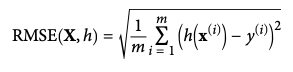

* **MAE** Mean Absolute Error: average absolute deviation
    * Manhattan Norm (measure the distance between two points in a city if you can only travel along orthogonal city blocks): $l_1$ *norm*, $||\cdot||_1$

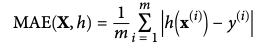

* The $l_k$ *norm* of a vector $\boldsymbol{v}$ containing $n$ elements is defined as $||\boldsymbol{v}||_k = (|v_0|^k + |v_1|^k + ... + |v_n|^k)^\frac{1}{k}$. $l_0$ gives the number of nonzero elements in the vector, and $l_\infty$ gives the maximum absolute value in the vector.
* The higher the norm index, the more it focuses on large values and neglects small ones. This is why the RMSE is more sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.

## 2. Get the data

Download the data and get a quick look. 

Test set should be separated without looking into the data, but more info on the data helps on generating a more representative test set (i.e. stratification)

In [56]:
import pandas as pd
import numpy as np

In [65]:
housing = pd.read_csv('datasets/Test_sets/housing.csv')

Target `median_house_value`. 

### Get a quick look of the data

In [64]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Get info on the dataframe structure (number of examples and features) using `shape`

In [59]:
housing.shape

(20640, 10)

Use `info()` to get a description of the data:
* total number of rows
* attribute’s type
* number of nonnull values

In [60]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


For categorical features use `value_counts()` to get the number of items per category

In [61]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Summary of numerical attribute with `describe()`

In [62]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Visualise the data

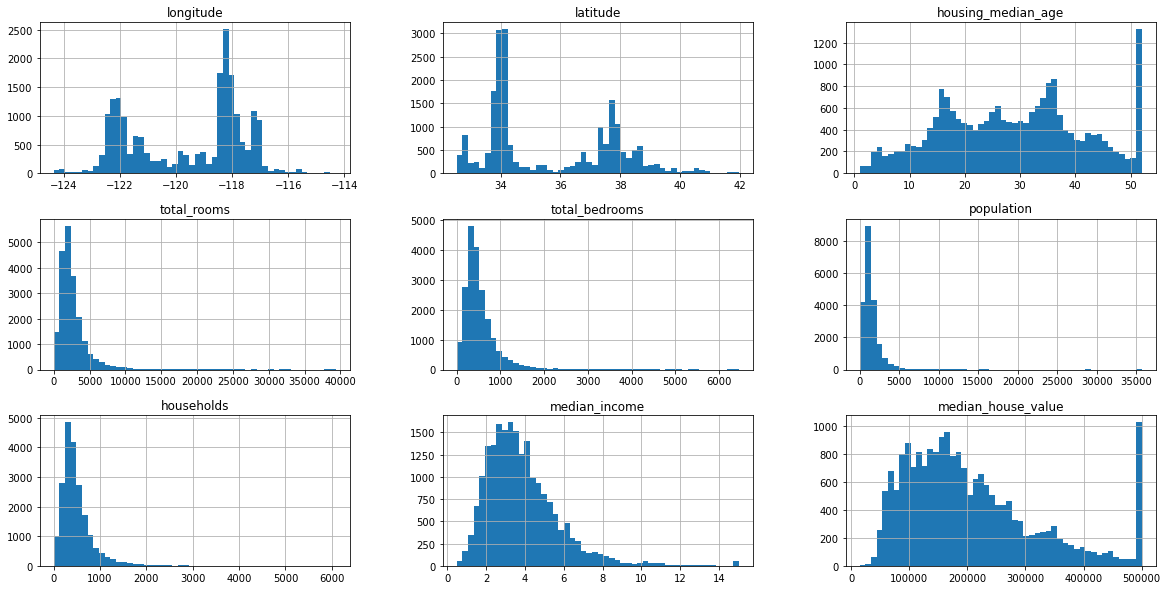

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 10))
plt.show()

### Generate test set

*Random sampling methods*

* Random split specifying the % of test set
* Specify `random_state` to have consistent sampling, and avoid test example to be part of the train in future splits
* To have a stable train/test split even after updating the dataset, a common solution is to use each instance’s identifier to decide whether or not it should go in the test set (assuming instances have a unique and immutable identifier). See page 52
   * Use row index as ID
   * Build a unique identifier 

In [66]:
# Split sets
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

*Stratified sampling* 

Used for small dataset, to avoid sampling bias. 

The population is divided into homogeneous subgroups called *strata*, and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the overall population.

It is important to have a sufficient number of instances for each stratum, or else the estimate of a stratum’s importance may be biased: 
* Not too many strata
* Each stratum should be large enough

Example: statify for the `median_income` feature

Use `pd.cut()` to create categories and `StratifiedShuffleSplit()` to split the data. 

In [72]:
# Add category to df
housing['income_cat'] = pd.cut(housing['median_income'], 
                        bins=[0. , 1.5, 3., 4.5, 6, np.inf], 
                        labels=[1, 2, 3, 4, 5])

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [73]:
# Split the data
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(housing, housing['income_cat']):
     strat_train_set = housing.loc[train_index]
     strat_test_set = housing.loc[test_index]

In [74]:
# Remove the `cat_income` attribute
for set_ in (strat_train_set, strat_test_set): 
    set_.drop("income_cat", axis=1, inplace=True)

## 3. Explore the data

Exploration done on a copy of **training set** and it can be sampled if too big. 

If geografical data, they can be visualised on a map (see page 56). 

In [75]:
# Copy the trainig data
housing = strat_train_set.copy()

### Correlation

Compute the standard correlation coefficient (Pearson's) using `corr()`. 

In [78]:
# Calculate the correlation matrix and visualise it using colors
corr_matrix = housing.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [80]:
# Check correlation with target
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Correlation coefficient [-1, 1]: 
* 1: strong positive correlation
* -1: strong negative correlation
* 0: no linear correlation (can be other nonlinear relationship)

`scatter_matrix()` can be used to plot numerical attributes one versus the others

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

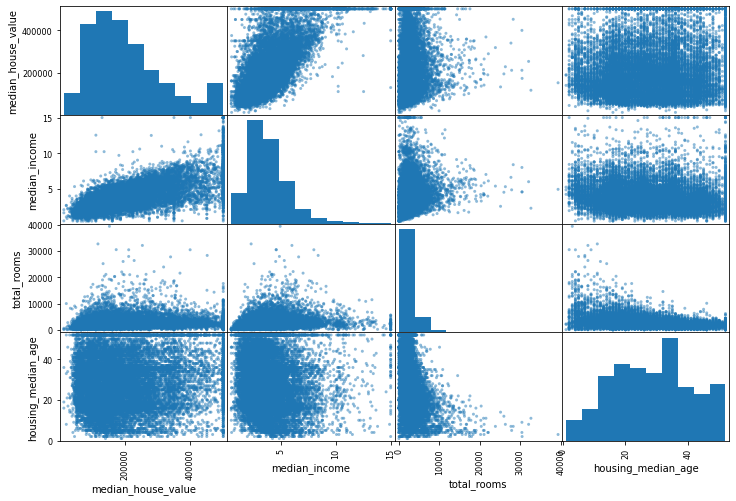

In [81]:
# Select a few attributes to plot
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
                  "housing_median_age"]
scatter_matrix(train_set[attributes], figsize=(12, 8))

In the main diagonal: histogram of each attribute. 

### Experiment with attribute combinations

* Tail heavy distribution: compute logarithm
* Try attribute combinations

## 4. Prepare the data

Use functions to prepare the data for Machine Learning. 

### Separate data and labels

In [82]:
# X set
housing = strat_train_set.drop('median_house_value', axis=1)
# y set
housing_labels = strat_train_set['median_house_value'].copy()

### Scikit Learn - design principles

**Consistency**

All objects share a consistent and simple interface:

*Estimators*
* Any object that can estimate some parameters based on a dataset 
* Estimation performed by the `fit()` method
* One parameter: dataset
* Two parameters for supervised learning algorithms: dataset and labels
* Hyperparameters (needed to guide the estimation process i.e. imputer's strategy): set as an instance variable (via a constructor parameter)

*Transformers* 
* Estimators that can also transform a dataset
* Transformation performed by the `transform()` method 
* Parameter:  dataset to transform
* Returns the transformed dataset
* Transformation relies on the learned parameters
* `fit_transform()` method: equivalent to calling `fit()` and then `transform()` (but sometimes `fit_transform()` is optimized and runs much faster)

*Predictors*
* Estimators that can make predictions 
* Prediction performed by the `predict()` method
* Parameter: dataset of new instances 
* Return dataset of corresponding predictions 
* `score()` method that measures the quality of the predictions given a test set (and the corresponding labels, in the case of supervised learning algorithms)

**Inspection**

All the estimator’s hyperparameters are accessible directly via public instance variables (e.g., `imputer.strategy`), and all the estimator’s learned parameters are accessible via public instance variables with an underscore suffix (e.g., `imputer.statistics_`).

**Nonproliferation of classes**

Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of homemade classes. Hyperparameters are just regular Python strings or numbers.

**Composition**

Existing building blocks are reused as much as possible. For example, it is easy to create a `Pipeline` estimator from an arbitrary sequence of transformers followed by a final estimator, as we will see.

**Sensible defaults**
Scikit-Learn provides reasonable default values for most parameters, making it easy to quickly create a baseline working system.


### Data cleaning

**Missing features**
1. Get rid of lines with missing values: `dropna()`

In [86]:
housing.dropna(subset=['total_bedrooms']).shape

(16354, 9)

2. Get rid of attribute (column) with missing values: `drop()`

In [87]:
housing.drop('total_bedrooms', axis=1).shape

(16512, 8)

3. Set the values to some value (zero, mean, median, ...): `fillna()`

Save the median value to replace the test set and eventual new data with the same one

In [90]:
# Calculate median
median=housing['total_bedrooms'].median()

#Replace values
housing['total_bedrooms'].fillna(median).shape

(16512,)

`SimpleImputer()` can be used to replace missing values (only works on numerical attributes)

In [92]:
# Create a copy of the df with only numerical attributes - not needed when columns are specified in the pipeline
housing_num = housing.drop('ocean_proximity', axis=1)

In [94]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer
imputer = SimpleImputer(strategy='median')
# Fit on the training data - all of them, in case missing values will be present on other features with new data
imputer.fit(housing_num)
# Transform data
X = imputer.transform(housing_num)

In [95]:
# Get imputer info
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

The result is a NumPy array, it can be converted into a Pandas DataFrame

In [97]:
# Make df
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

**Text and categorical attributes**

Needs to be converted into numbers as Machine Learning algorithms only work with numbers. 

1. Convert categories to number: `OrdinalEncoder`

In [100]:
# Get categorical attributes
housing_cat = housing[['ocean_proximity']]
#housing_cat.head(10)

In [101]:
# Instantiate and fit the estimator
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [103]:
# Visualise new df
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [104]:
# Get list of categories
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Consecutive numbers used, so two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad,” “average,” “good,” and “excellent”), but not in all. 

2. Create binary attributes for each category: `OneHotEncoder()`

Convert categorical values into one hot vectors. The new attributes are called *dummy attributes*

In [105]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Results: sparse matrix that stores the location of non zero elements. Can be converted to array with the `toarray()` method. 

If a categorical attribute has a large number of possible categories, then one-hot encoding will result in a large number of input features. This may slow down training and degrade performance. 
* Replace the categorical input with useful numerical features related to the categories
* Replace each category with a learnable, low-dimensional vector called an *embedding*. Each category’s representation would be learned during training (*representation learning*)

**Custom transformer**

Write specific tasks such as custom cleanup operations or combining specific attributes, by creating a class and implement three methods: 
* `fit()` returning self
* `transform()`
* `fit_transform()`

Using base classes to get extra methods/parameters: 
* `TransformerMinin`
    * `fit_transform`
* `BaseEstimator`
        * `*args` and `*kargs`
        * Methods for hyperparameter tuning: `get_params()` and `set_params`

Example: add combined attributes

In [114]:
# Define function to add attributes
from sklearn.base import BaseEstimator, TransformerMixin

# Column number per every feature
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin): 
    def __init__(self, add_bedrooms_per_room=True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X): 
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                             bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [118]:
# Instantiate and apply
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

**Feature scaling**

Generally not required, but ML works better when the attributes have similar scales. 

* Normalisation or min-max scaling: `MinMaxScaler()`
    * Values shifted and rescaled to range from 0 to 1 (or custom range)
    * Subtracting the min value and dividing by the max minus the min
* Standardisation: `StandardScaler()`
    * Subtract the mean value (always have a zero mean), then divide by the standard deviation so that the resulting distribution has unit variance. 
    * Not bound values to a specific range (might be needed by Neural Networks)
    * Less affected by outliers
    
Fit against the training set and transform the test set. 

**Transformation pipelines**

`Pipeline()` to help with transformations in a specified order. 
* List of name/estimator pairs defining a sequence of steps
* They must all be transformers except for the last one
* Calls `fit_transform()` on all transfromers sequentially and pass the output to the next one. Calls `fit()` for the final estimator

Example: pipeline for numerical values

In [119]:
# Instantiate Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('attribs_adder', CombinedAttributesAdder()), 
    ('std_scaler', StandardScaler())
])

In [120]:
# Fit and transform using the pipeline

housing_num_tr = num_pipeline.fit_transform(housing_num)

Use `ColumnTransformer()`, a single transformer to handle all columns, applying the appropriate transformations to each column, both numerical and categorical. 

The constructor requires a list of tuples, containing: 
* Name
* Transformer
* List of names (or indices) of columns that the transformer should be applied to

In [121]:
# Get list of numerical and categorical colums 
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

In [124]:
# Construct column transformer
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs), 
    ('cat', OneHotEncoder(), cat_attribs)
])

In [125]:
# Apply column transformer
housing_prepared = full_pipeline.fit_transform(housing)

Output: 
* `OneHotEncoder`: sparse matrix
* `num_pipeline`: dense matrix

In case of this mix, the `ColumnTransformer` estimates the density of the final matrix (i.e., the ratio of nonzero cells), and it returns a sparse matrix if the density is lower than a given threshold (by default, `sparse_threshold=0.3`).

Instead of using a transformer:
* `drop`: columns to be dropped
* `passthrough`: columns to be left untouched

By default, the remaining columns (i.e., the ones that were not listed) will be dropped, but you can set the `remainder` hyperparameter to any transformer (or to `passthrough`) if you want these columns to be handled differently.

### Select and train a model

**Training and evaluating on the training set**

Example: ***Linear Regression***


In [130]:
# Select 5 examples to test the model and transform
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

# Transform with full pipeline
some_data_prepared = full_pipeline.transform(some_data)

# Check shape of selected data
some_data_prepared.shape, some_labels.shape

((5, 16), (5,))

In [126]:
# Fit (train) a linear regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [131]:
# Use the model to make predictions 
lin_reg.predict(some_data_prepared)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

In [133]:
# Compare with labels
list(some_labels)

[286600.0, 340600.0, 196900.0, 46300.0, 254500.0]

Evaluate the RMSE on the whole trainig set using `mean_squared_error()`

In [134]:
# Make predicitons on the whole dataset
housing_predictions = lin_reg.predict(housing_prepared)

In [136]:
# Evaluate RMSE
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

Big error, the model is *underfitting* the training data: 
* Features do not provide enough information to make good predictions
* Model is not powerful enough

How to fix underfitting: 
* Select a more powerful model
* Feed the training algorithm with better features
* Reduce the constraints on the model

Example: ***DecisionTreeRegressor***

More complex model

In [140]:
# Instantiate and fit DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [145]:
# Make predictions
housing_predictions = tree_reg.predict(housing_prepared)

In [146]:
# Evaluate on the training set
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Model is *overfitting* the training data. 

**Cross Validation**

* Split the data into *validation set* 
* *K-fold cross validation* 
    * Rndomly splits the training set into k distinct subsets called folds
    * Trains and evaluates the Decision Tree model k times, picking a different fold for evaluation every time and training on the other k-1 folds
    * Result: array containing the k evaluation scores
    
Scikit-Learn’s cross-validation features expect a *utility function* (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes `-scores` before calculating the square root.

In [151]:
# Define function to display scores
def display_scores(scores): 
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

In [152]:
# Instantiate the cross validation 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                        scoring='neg_mean_squared_error', cv=10)

In [153]:
# Get and display RMSE scores 
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores:  [69125.28275105 66726.50718554 72001.05035855 69675.2307047
 71379.02157199 74781.73028416 70286.14584279 71302.59360411
 76561.35948774 68446.9085721 ]
Mean:  71028.58303627289
Standard Deviation:  2775.2394191765275


Calculate the score for the *LinearRegression* model

In [159]:
# Cross validation using LinearRegression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                             scoring="neg_mean_squared_error", cv=10) 

In [162]:
# Get and display RMSE
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard Deviation:  2731.674001798348


Example: ***RandomForestRegressor***

Training many Decision Trees on random subsets of the features, then averaging out their predictions. 

Building a model on top of many other models is called *Ensemble Learning*, and it is often a great way to push ML algorithms even further.

In [164]:
# Instantiate and fit the model
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [167]:
# Make predictions
forest_predictions = forest_reg.predict(housing_prepared)

In [168]:
# Evaluate on the training set
forest_mse = mean_squared_error(housing_labels, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18757.576682911946

In [165]:
# Cross validation RandomForestRegressor
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                             scoring="neg_mean_squared_error", cv=10) 

In [166]:
# Get and display RMSE
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [49520.67803011 47843.18373783 49562.78407695 52252.50009077
 49713.67844627 53193.70652555 49187.89069729 47668.61425204
 53109.29066813 50778.53581178]
Mean:  50283.086233672395
Standard Deviation:  1897.249880823868


Score on the training set is much lower than on the validation sets, meaning that the model is *overfitting* the training set: 
* Simplify the model
* Constrain the model (i.e., regularize it)
* Get a lot more training data. 

Before diving deeper into a specific model, try out many other models from various categories of Machine Learning algorithms (e.g., several Support Vector Machines with different kernels, and possibly a neural network), without spending too much time tweaking the hyperparameters. The goal is to shortlist a few (two to five) promising models.

Save every model you experiment with so that you can come back easily to any model you want:
* Hyperparameters 
* Trained parameters
* Cross-validation scores 
* Predictions as well

This will allow you to easily compare scores across model types, and compare the types of errors they make. 

Use Python’s `pickle` module `joblib` library, which is more efficient at serializing large NumPy arrays (install using `pip`).

In [ ]:
# Code to save the model 

my_model = full_pipeline_with_predictor

import joblib
joblib.dump(my_model, "my_model.pkl") 

# Load model 
my_model_loaded = joblib.load("my_model.pkl") 

### Fine-tune a model

**Grid Search**

Use `GridSearchCV()` to test all the different combinations of specified hyperparameters and values. 

When you have no idea what value a hyperparameter should have, a simple approach is to try out consecutive powers of 10 (or a smaller number if you want a more fine-grained search. 

In [170]:
# Define parameters, construct Grid and train

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

# Instantiate estimator
forest_reg = RandomForestRegressor(random_state=42)

# Construct Grid
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                          scoring='neg_mean_squared_error', 
                          return_train_score=True)

# Fit the model
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Use `.best_params_` to identify the best combinations of parameters and `.best_estimator_` to directly get the best estimator

In [171]:
# Get best parameters
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [172]:
# Get best estimator
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

If `GridSearchCV` is initialized with `refit=True` (which is the default), then once it finds the best estimator using cross-validation, it retrains it on the whole training set. 

*Evaluation*

All the information of the grid search are stored and can be visualised using `.results_` and can be used to visualise the score for every evaluation performed.

In [174]:
# Save results
cvres = grid_search.cv_results_

# Print scores
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

Data preparation steps can be treated as hyperparameters. For example, the grid search will automatically find out whether or not to add a feature you were not sure about (e.g., using the add_bedrooms_per_room hyperparameter of your CombinedAttributesAdder transformer). It may similarly be used to automatically find the best way to handle outliers, missing features, feature selection, and more.

**Randomised Search**

When the hyperparameter space is large, use `RandomisedSearchCV()`: evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. 

* If the randomized search is run for X iteratinos, it will explore X different values for each hyperparameter 
* By setting the number of iterations, you can control the computing budget allocated to hyperparameter search

**Ensemble methods**

Combine the models that perform best. The group (or “ensemble”) will often perform better than the best individual model. 

**Analyse the best models and their errors**

Use `.best_estimator_.feature_importances_` to get the relative importance of each attribute for making accurate predictions. 


In [176]:
# Get feature importances
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

Add names to features importances.

In [ ]:
# Get names for new attributes calculated 
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

In [182]:
# Access the transformer by name (select the 'cat' transformer)
cat_encoder = full_pipeline.named_transformers_['cat']
cat_encoder

OneHotEncoder()

In [183]:
# Get categories for categorical variable
cat_one_hot_attribs = list(cat_encoder.categories_[0])
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [184]:
# Combine all attributes together
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [185]:
# Combine feature importances with names
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

**Evaluate the system on the test set**

Evaluate the final model on the test set:
* Get the predictors and the labels from the test set
* Run the full_pipeline to transform the data (call `transform()`, not `fit_transform()`)

In [187]:
# Separate features and labels from test set
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [188]:
# Transform the data using the pipeline (num, cat, new categories)
X_test_prepared = full_pipeline.transform(X_test)

In [186]:
# Save model with best parameters
final_model = grid_search.best_estimator_
final_model

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [189]:
# Make predictions
final_predictions = final_model.predict(X_test_prepared)

In [190]:
# Evaluate model
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47730.22690385927

To have an idea of the estimate precision, compute a *95% confidence interval for the generalization error* using `scipy.stats.t.interval()`

In [192]:
# Calculate confidence interval 

from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])

Do not tweak the hyperparameters according to the results on the test set, as the improvement won't help generalising on new data. 

### Launch, monitor and maintain the system

1. Save the trained Scikit-Learn model (e.g., using joblib) with the full preprocessing and prediction pipeline
2. Load the trained model within the production environment 
3. Use the tranied model to make predictions with the `predict()` method

Methods
* Website
* Web service accessed by the application by REST API 
* Cloud

4. Write monitoring code to check the system’s live performance at regular intervals and trigger alerts when it drops: 
    * Inferred from downstream metrics
    * Human analysis 
5. Define what to do in case of failures
6. Automate as much as possible 
    * Collect fresh data regularly and label it (e.g., using human raters).
    * Script to train the model and fine-tune the hyperparameters
    * Script to evaluate the new and the previous model on the updated test set, and deploy the model to production if the performance has not decreased
7. Evaluate the model's input data quality
8. Keep backups of every model created and have the process and tools in place to roll back to a previous model quickly, in case the new model starts failing badly for some reason
9. Keep backups of every version of your datasets so that you can roll back to a previous dataset if the new one ever gets corrupted (e.g., if the fresh data that gets added to it turns out to be full of outliers)
10. Create several subsets of the test set in order to evaluate how well your model performs on specific parts of the data

## Exercises

**Question 1**: Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

In [195]:
from sklearn.svm import SVR

# Define parameters
param_grid = [
    {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
    {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0], 
     'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}
]

# Instantiate estimator
svr_reg = SVR()

# Construct Grid
grid_search = GridSearchCV(svr_reg, param_grid, cv=5, 
                          scoring='neg_mean_squared_error', 
                          verbose=2)

# Fit the model
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=  19.9s
[CV] END ..............................C=10.0, kernel=linear; total time=  15.4s
[CV] END ..............................C=10.0, kernel=linear; total time=  13.1s
[CV] END ..............................C=10.0, kernel=linear; total time=  13.3s
[CV] END ..............................C=10.0, kernel=linear; total time=  17.9s
[CV] END ..............................C=30.0, kernel=linear; total time=  17.1s
[CV] END ..............................C=30.0, kernel=linear; total time=  15.8s
[CV] END ..............................C=30.0, kernel=linear; total time=  15.4s
[CV] END ..............................C=30.0, kernel=linear; total time=  18.9s
[CV] END ..............................C=30.0, kernel=linear; total time=  13.2s
[CV] END .............................C=100.0, kernel=linear; total time=  11.8s
[CV] END .............................C=100.0, 

[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  24.2s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  24.0s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  23.9s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  24.0s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  23.4s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  24.0s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  24.5s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  24.9s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  30.4s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  23.5s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  23.5s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  23.5s
[CV] END ...................

[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=  21.1s
[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=  20.9s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  20.4s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  20.5s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  20.5s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  20.5s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  20.7s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  20.3s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  20.5s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  20.5s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  20.5s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  20.5s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [197]:
# Get best parameters
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

In [198]:
# Get best estimator
grid_search.best_estimator_

SVR(C=30000.0, kernel='linear')

In [200]:
# Get the best score
grid_best_score = grid_search.best_score_
grid_best_score

-4951069990.337732

In [201]:
# Get RMSE to evaluate the model
np.sqrt(-grid_best_score)

70363.84007668805

**Question 2**: Try replacing `GridSearchCV` with `RandomizedSearchCV`.


In [204]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# Define parameters
param_distribs = {
    'kernel': ['linear', 'rbf'], 
    'C': reciprocal(20, 200000), 
    'gamma': expon(scale=1.0)
}

# Instantiate estimator
svm_rand = SVR()

# Construct randomised search
rand_search = RandomizedSearchCV(svm_rand, param_distributions=param_distribs, 
                                 n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42, verbose=2)

# Fit the model

rand_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=  16.5s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=  13.2s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=  11.7s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=  14.2s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=  15.9s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  29.2s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  24.9s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  23.3s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  24.1s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  41.4s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=  20.5s
[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=  21.2s
[CV] END C=8935.505635947808, gamma=0.37354658165762367, kernel=rbf; total time=  20.8s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=  10.8s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=  10.8s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=  10.7s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=  10.8s
[CV] END C=135.76775824842434, gamma=0.838636245624803, kernel=linear; total time=  10.6s
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 3.8min
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 2.9min
[CV] END C=151136.20282548846, gamma=1.4922453771381408, kernel=rbf; total time= 2.7min
[CV] END C=151136.2028

[CV] END C=60.17373642891687, gamma=1.2491263443165994, kernel=linear; total time=  10.6s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=  20.6s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=  20.7s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=  20.7s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=  20.7s
[CV] END C=15415.161544891856, gamma=0.2691677514619319, kernel=rbf; total time=  20.6s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=  11.1s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=  11.3s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=  11.3s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=  11.3s
[CV] END C=1888.9148509967113, gamma=0.739678838777267, kernel=linear; total time=  11.2s
[CV] END C=55.538389

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb3dad23e80>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb3dd5825e0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [206]:
# Get best parameters
rand_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

In [207]:
# Get best estimator
rand_search.best_estimator_

SVR(C=157055.10989448498, gamma=0.26497040005002437)

In [208]:
# Get the best score
rand_best_score = rand_search.best_score_
rand_best_score

-2999529520.341318

In [209]:
# Get RMSE to evaluate the model
np.sqrt(-rand_best_score)

54767.960710084124

Plotting the distribution of the `gamma` values tested.

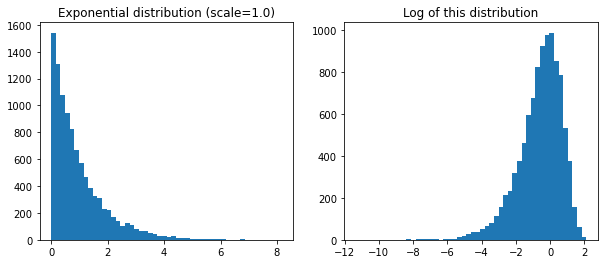

In [210]:
# Define distribution
expon_distrib = expon(scale=1.)
# Select points to plot
samples = expon_distrib.rvs(10000, random_state=42)
# Plot
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

Most values are concentrated roughly in the range of exp(-2) to exp(+2), which is about 0.1 to 7.4.

Plotting the distribution for `C`: the scale of the samples is picked from a uniform distribution within a given range, which is why the right graph, which represents the log of the samples, looks roughly constant. This distribution is useful when you don't have a clue of what the target scale is. 

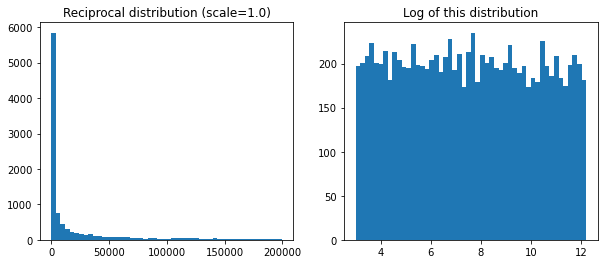

In [212]:
# Define distribution
reciprocal_distrib = reciprocal(20, 200000)
# Select points to plot
samples = reciprocal_distrib.rvs(10000, random_state=42)
# Plot
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

* **Reciprocal distribution**: useful when you have no idea what the scale of the hyperparameter should be (all scales are equally likely, within the given range)
* **Exponential distribution**: when you know (more or less) what the scale of the hyperparameter should be

**Question 3**: Try adding a transformer in the preparation pipeline to select only the most important attributes.

Define a function to select only the k more improtant attributes. This function assumes that the feature importance has been already calculated (very slow since the feature importances would have to be computed for every hyperparameter combination (unless you implement some sort of cache).

In [237]:
# Define function to add attributes
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    # np.argpartition divides arguments smaller and bigger than k
    # Then select only bigger arguments, including k
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [238]:
# Define the number of features to keep
k = 5

In [239]:
# Get the indexes of the k features
top_k_feature_indices = indices_of_top_k(feature_importances, k)
# Get the k attributes
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

In [240]:
# Check the values of top indices
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude')]

Create a pipeline for the full processing: 
* Preparation
* Feature selection


In [241]:
# Define pipeline
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [242]:
# Run the pipeline
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [243]:
# Check the tree top feature 
housing_prepared_top_k_features[0:3]

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ]])

In [244]:
# Check top k features
housing_prepared[0:3, top_k_feature_indices]

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ]])

**Question 4**: Try creating a single pipeline that does the full data preparation plus the final prediction.

In [247]:
# Define final pipeline
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**grid_search.best_params_))
])

In [248]:
# Fit pipeline
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                    

In [249]:
# Select some data 
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

In [252]:
# Make predictions and compare with labels

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [189028.33088227 325513.70827951 179741.23709483  67902.71035941]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0]


**Question 5**: Automatically explore some preparation options using `GridSearchCV`.

In [254]:
# Define the parameters grid 
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

# Construct Grid
grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)

# Fit the model
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  21.1s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  19.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  14.5s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  18.4s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  12.2s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  13.3s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  14.1s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  15.2s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  16.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total t

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  20.0s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  16.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  15.3s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  17.2s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  16.1s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  18.0s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  19.3s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  17.4s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  15.9s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  15.8s
[CV] END feat

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  19.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  19.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  18.9s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  18.1s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  25.8s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  23.6s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  24.2s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  21.6s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  21.5s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  23.5s
[CV] END feat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
       